<a href="https://colab.research.google.com/github/nicolasAT08/MineriadeDatos/blob/main/TallerAgrupacion_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>MINERIA DE DATOS</h1>
<strong>Taller Agrupación</strong><br />
PROFESORA ELIZABETH LEON GUZMAN <br />
<strong>TEMA</strong> Algoritmos de Agrupación - Validación</center>

-------

***Presentado por:*** *Nicolás Aranguren T.*

#DBSCAN


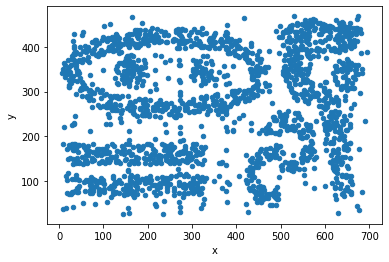

In [5]:
# Lectura del archivo chameleon
import pandas as pd

data = pd.read_csv('chameleon.data', delimiter=' ', names=['x','y'])
data.plot.scatter(x='x',y='y')

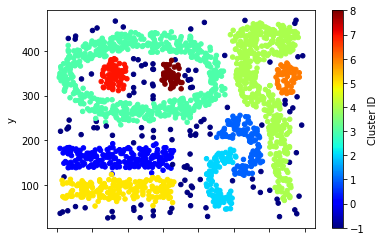

In [6]:
#Aplicacion del algoritmo DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=15.5, min_samples=5,).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')

##**Ejercicio 1**

Aplicar el algoritmo DBScan a otro conjunto de datos. Analice los resultados variando epsilon y min_samples

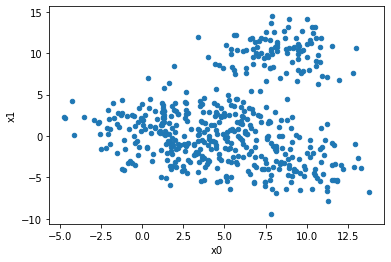

In [8]:
import pandas as pd

data1 = pd.read_csv('cluster1.csv', delimiter=',')
data1.plot.scatter(x='x0',y='x1')

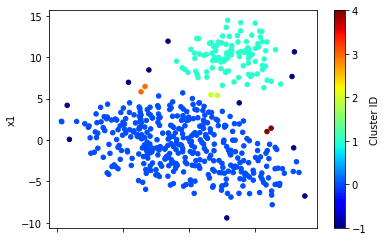

In [9]:
#Aplicacion del algoritmo DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=1.25, min_samples=2,).fit(data1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data1,labels), axis=1)
result.plot.scatter(x='x0',y='x1',c='Cluster ID', colormap='jet')

#Gaussian Mixture Model (GMM)

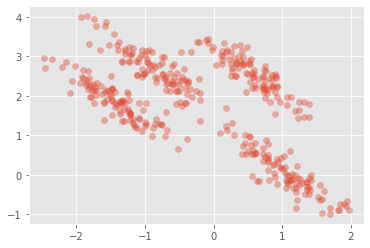

In [83]:
# Importamos librerías
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
from sklearn.datasets.samples_generator import make_blobs
# Creamos un dataset sintético de cuatro clusters no circulares
X0, _ = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
rng = np.random.RandomState(13)
X0=np.dot(X0, rng.randn(2, 2))

plt.scatter(X0[:,0],X0[:,1],alpha=0.4)

In [84]:

from sklearn.mixture import GaussianMixture

model=GaussianMixture(n_components=4, covariance_type='full', random_state=42)
model.fit(X0)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Text(0.5, 1.0, 'GMM')

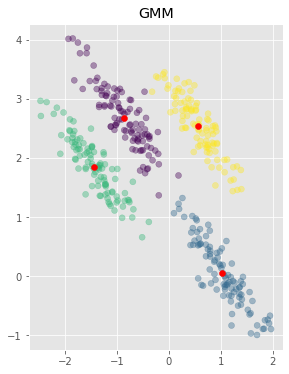

In [85]:
# Se dibujan los clusters obtenidos 
plt.figure(figsize=(10,6))
pred2=model.predict(X0)
plt.subplot(122)
plt.scatter(X0[:,0],X0[:,1],c=pred2,alpha=0.4)
plt.scatter(model.means_[:,0],model.means_[:,1],c="r")
plt.title("GMM")

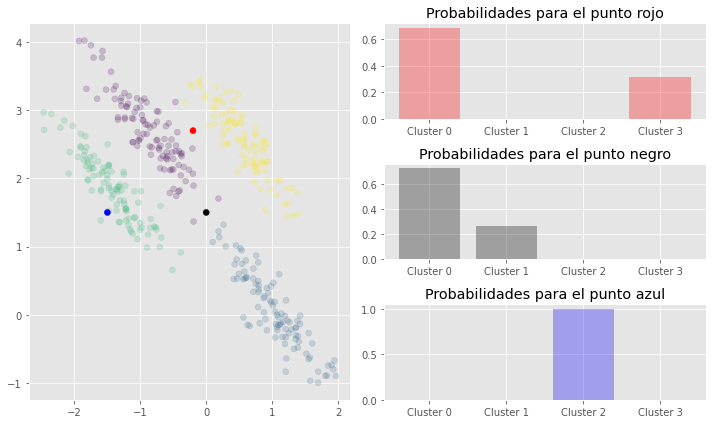

In [86]:
# En este ejmplo se visualizará la representación probabilística de tres puntos seleccionados: 
# punto rojo, punto negro y punto azul (en la gráfica1). Se escogen estos puntos que se 
# encuentran en la frontera con el fin de que pertenezcan a más de un cluster.

#Cambiar aqui la coordenada de los puntos y revisar el que se quiere evaluar

plt.figure(figsize=(10,6))
point=np.array([[-0.2,2.7],
                [0,1.5],
                [-1.5,1.5]])
probs=model.predict_proba(point)
plt.subplot(121)
plt.scatter(X0[:,0],X0[:,1],c=pred2,alpha=0.2)
plt.scatter(point[:,0],point[:,1],c=["r","k","b"])
plt.subplot(322)
plt.bar(["Cluster {}".format(i) for i in range(4)],probs[0].flatten(), color="r", alpha=0.3)
plt.title("Probabilidades para el punto rojo")
plt.subplot(324)
plt.bar(["Cluster {}".format(i) for i in range(4)],probs[1].flatten(), color="k", alpha=0.3)
plt.title("Probabilidades para el punto negro")
plt.subplot(326)
plt.bar(["Cluster {}".format(i) for i in range(4)],probs[2].flatten(), color="b", alpha=0.3)
plt.title("Probabilidades para el punto azul")
plt.tight_layout()

##**Ejercicio 2**: ¿Cuáles serían las probabilidades para el punto (-1.5,1.5)?

**RESPUESTA:** se calcula la probabilidad para el punto $(0.2,1.2)$, ya que el punto $(-1.5,1.5)$ se encuentra calculado en el ejemplo. Las probabilidades par el punto $(0.2,1.2)$ son para el cluster 0: $17\%$ *aprox*., y para el cluster 1: $83\%$ *aprox*.

##**Ejercicio 3**: Ejecutar el algoritmo Kmean con este conjunto de datos. Comparar visualmente los resultados de los dos modelos. 

**RESPUESTA:** visualmente se observa como el modelo DBScan logra identificar de mejor manera los clusters, mientras el modelo KMeans no agrupa algunos de los puntos de manera correcta dejándolos como puntos de un cluster diferente al cual pertenece.

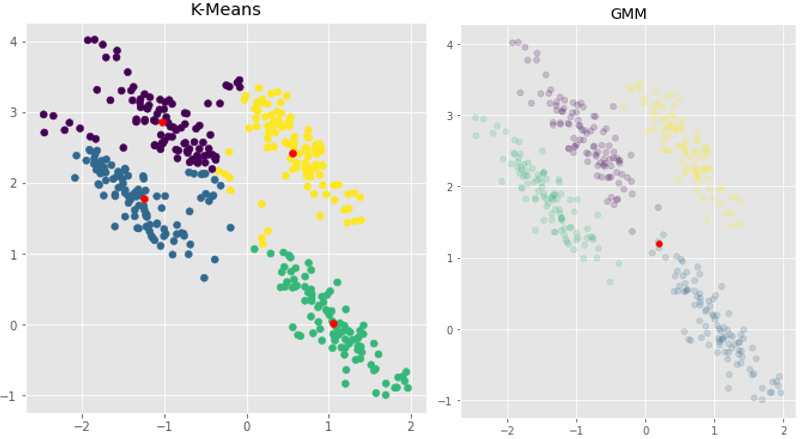

##**Ejercicio 4**: Aplicar DBScan al conjunto de datos




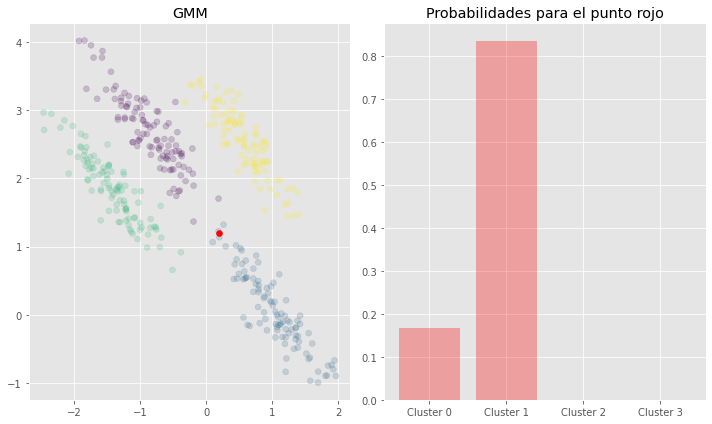

In [57]:
# En este ejmplo se visualizará la representación probabilística de tres puntos seleccionados: 
# punto rojo, punto negro y punto azul (en la gráfica1). Se escogen estos puntos que se 
# encuentran en la frontera con el fin de que pertenezcan a más de un cluster.

#Cambiar aqui la coordenada de los puntos y revisar el que se quiere evaluar

plt.figure(figsize=(10,6))
point=np.array([[0.2,1.2]])
probs=model.predict_proba(point)
plt.subplot(121)
plt.title('GMM')
plt.scatter(X[:,0],X[:,1],c=pred2,alpha=0.2)
plt.scatter(point[:,0],point[:,1],c=["r"])
plt.subplot(122)
plt.bar(["Cluster {}".format(i) for i in range(4)],probs[0].flatten(), color="r", alpha=0.3)
plt.title("Probabilidades para el punto rojo")
plt.tight_layout()

In [35]:
# Definición de una funcion del simplekmeans para ver por iteraciones
X1 = X.copy()
from sklearn.metrics.pairwise import euclidean_distances
def simple_kmeans(X1,k, iter=100):
    # Inicializacion de los primeros centroides
    init_clus=np.random.choice(np.arange(X1.shape[0]),replace=False, size=k)
    #print(init_clus)
    clusters=X1[init_clus]
    preds=np.argmin(euclidean_distances(X1,clusters),axis=1)
    all_clusters=[clusters.copy()]
    all_preds=[preds]
    for i in range(iter):
        for clus in range(k):
            clusters[clus]=X1[preds==clus].mean(axis=0)
            all_clusters.append(clusters.copy())
            preds=np.argmin(euclidean_distances(X1,clusters),axis=1)
            all_preds.append(preds.copy())
    return all_clusters,all_preds

all_clusters,all_preds=simple_kmeans(X1,4)

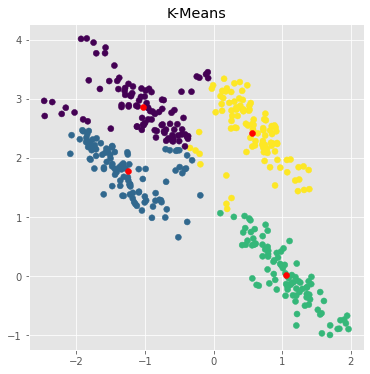

In [36]:
iteration=100 #@param {type:"slider", min:0, max:100, step:1}
plt.figure(figsize=(6,6))
plt.title('K-Means')
plt.scatter(X1[:,0],X1[:,1],c=all_preds[iteration])
plt.scatter(all_clusters[iteration][:,0],all_clusters[iteration][:,1],c="r")


Text(0.5, 1.0, 'DBScan')

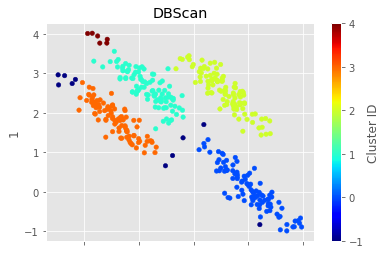

In [63]:
#Aplicacion del algoritmo DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np
X2 = X.copy()
Xdf = pd.DataFrame(X2)
db = DBSCAN(eps=0.3, min_samples=6,).fit(Xdf)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((Xdf,labels), axis=1)
result.plot.scatter(x=0,y=1,c='Cluster ID', colormap='jet')
plt.title('DBScan')

#Validación

##**Ejercicio 5**: Validar los resultados de agrupación de los tres modelos (k-means, GMM, y DBScan) usando la medida de validación interna Coeficiente de Silueta y DB.

In [97]:
### KMeans / Davies-Bouldin (DB)

from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=4, random_state=1).fit(X1)
labels = kmeans.labels_
davies_bouldin_score(X1, labels)

0.8346745909310901

In [96]:
### KMeans / Silhouette
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(X1, labels, metric='euclidean')

0.47291544105794125

In [99]:
### GMM / Davies-Bouldin (DB)

metrics.silhouette_score(X0, labels, metric='euclidean')

0.47291544105794125

In [100]:
### GMM / Silhouette
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(X0, labels, metric='euclidean')

0.47291544105794125

In [64]:
### DBScan / Silhouette
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(X2, labels, metric='euclidean')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.46497358385497733

In [102]:
### DBScan / Davies-Bouldin (DB)
davies_bouldin_score(Xdf, labels)

0.8346745909310901

**Ejercicio 6**: Dado la siguiente matriz de confusión

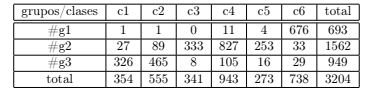

Calcular Pureza y Entropia

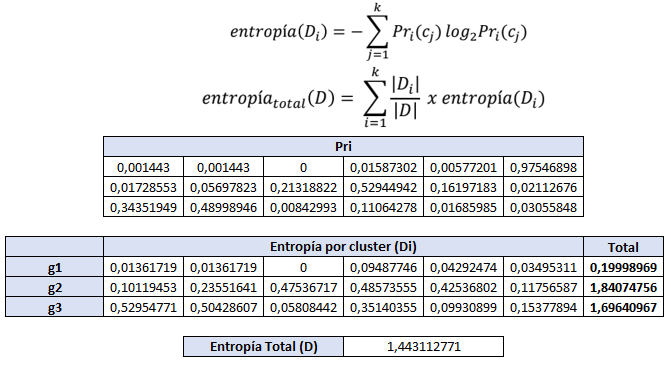

---------
**Referencias**

[1] TAN y otros. Introduction to Data Mining  (segunda edición)

[2] George Karypis, Eui-Hong Han, and Vipin Kumar. CHAMELEON: A Hierarchical Clustering Algorithm Using Dynamic Modeling. IEEE Computer 32(8): 68-75, 1999.
